In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [13]:
file = 'data/train.txt'
data = pd.read_csv(file, header=None)
data.columns = ['Speed']

In [39]:
data.head()

,Speed
0,28.105569
1,28.105569
2,28.106527
3,28.130404
4,28.109243


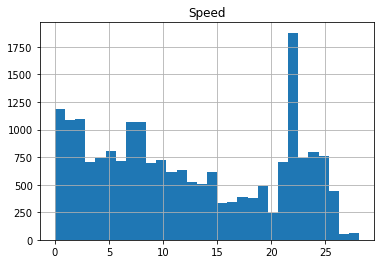

In [38]:
data.hist(bins=30)
plt.show()

In [42]:
# Minimum MSE for perfect categorical prediction with 30 categories
discrete_data = data.astype(int)
squared_error = np.square(data - (discrete_data + 0.5))
print(squared_error.mean())

Speed    0.087109
dtype: float64


In [53]:
# Minimum MSE for perfect categorical prediction with 15 categories
squared_error = np.square(data - (data // 2 + 0.5) * 2)
print(squared_error.mean())

Speed    0.391893
dtype: float64


In [71]:
# Minimum MSE for perfect categorical predictions with N categories
for bucket_size in (1, 2, 3, 5, 6, 10, 15, 30):
    squared_error = np.square(data - (data // bucket_size + 0.5) * bucket_size)
    mean_squared_error = squared_error.mean().values[0]
    num_cats = 30 // bucket_size
    print(f"Min MSE for bucket_size of {bucket_size} or {num_cats} categories: ", mean_squared_error)

Min MSE for bucket_size of 1 or 30 categories:  0.0871089472982928
Min MSE for bucket_size of 2 or 15 categories:  0.3918926574453516
Min MSE for bucket_size of 3 or 10 categories:  0.7142678601414301
Min MSE for bucket_size of 5 or 6 categories:  1.9802200240629988
Min MSE for bucket_size of 6 or 5 categories:  3.0876942629355475
Min MSE for bucket_size of 10 or 3 categories:  8.283760465484567
Min MSE for bucket_size of 15 or 2 categories:  15.290436411317902
Min MSE for bucket_size of 30 or 1 categories:  75.28212060470025


From looking at the resulting MSE for doing categorical predictions, 10 seems like a good number to shoot for. The 10 categories will be
     Range      (Center)
     
    [00 03)  ->   01.5
    [03 06)  ->   04.5
    [06 09)  ->   07.5
    [09 12)  ->   10.5
    [12 15)  ->   13.5
    [15 18)  ->   16.5
    [18 21)  ->   19.5
    [21 24)  ->   21.5
    [24 27)  ->   24.5
    [27 30)  ->   27.5

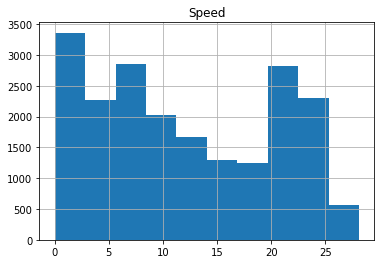

In [64]:
data.hist(bins=10)
plt.show()